In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def gen_curve(x):
  return -(4*x**3)+(6*x**2)-(4*x)+10*np.sin(5*x)

x=np.linspace(-2,4,10000)
y=gen_curve(x)
line=np.column_stack((x, y))

In [9]:
#np.savetxt('line_data.txt', line, delimiter=',', comments='',fmt='%.10f')
#print("Datos guardados en 'line_data.txt'")

In [4]:
index_sample=random.randint(0,line.shape[0])
err_x=0.025*(np.max(line[:,0])-np.min(line[:,0]))
err_y=0.025*(np.max(line[:,1])-np.min(line[:,1]))
new_point=(line[index_sample,0]+random.choice([1, -1])*err_x,line[index_sample,1]+random.choice([1, -1])*err_y)
new_point

(np.float64(3.758760876087609), np.float64(-137.40720538060614))

In [5]:
new_point=(-0.8797029702970297, 29.819387891489004) # The same value used in test.c

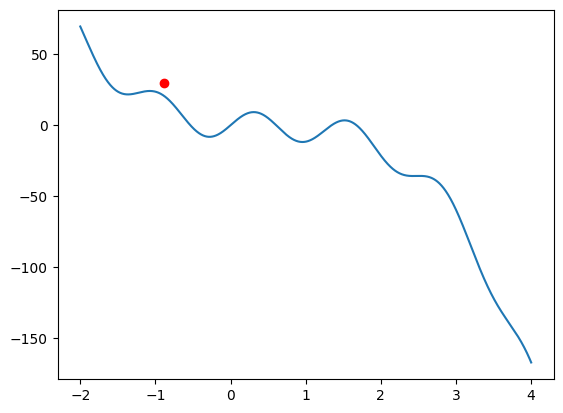

In [7]:
plt.plot(line[:,0],line[:,1])
plt.scatter(new_point[0],new_point[1],color='red')
#plt.scatter(line[index_sample,0],line[index_sample,1],color='black')

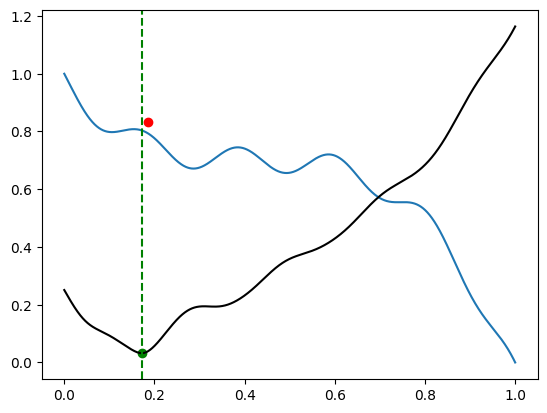

In [9]:
min_val = np.min(line, axis=0)
max_val = np.max(line, axis=0)
#print(min_val,max_val)

normalized_line = (line - min_val) / (max_val - min_val)
normalized_point = (new_point - min_val) / (max_val - min_val)

plt.plot(normalized_line[:,0],normalized_line[:,1])
plt.scatter(normalized_point[0],normalized_point[1],color='red')
distances = np.linalg.norm(normalized_line - normalized_point, axis=1)
plt.plot(normalized_line[:,0],distances,color="black")
plt.scatter(normalized_line[np.argmin(distances),0],np.min(distances),color='green')
plt.axvline(x=normalized_line[np.argmin(distances),0], color='green', linestyle='--')

In [7]:
print(normalized_point)
print(normalized_line[np.argmin(distances)])

[0.18671617 0.83233593]
[0.17191719 0.80369466]


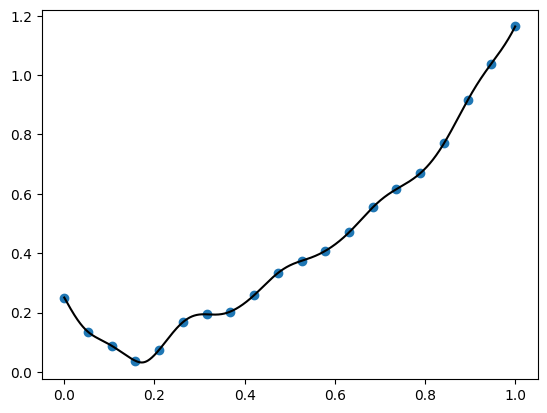

In [8]:
coarse_search_indexes=np.linspace(0,len(normalized_line)-1,20,dtype=int)
plt.plot(normalized_line[:,0],distances,color="black")
plt.scatter(normalized_line[coarse_search_indexes,0],distances[coarse_search_indexes])
plt.show()

Search space len: 1053


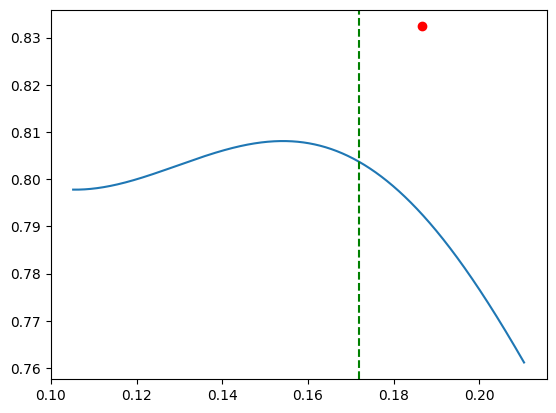

In [9]:
#coarse_search_indexes=np.linspace(0,len(normalized_line)-1,11,dtype=int)
coarse_search_points=normalized_line[coarse_search_indexes]
coarse_points_distances = np.linalg.norm(coarse_search_points - normalized_point, axis=1)
min_p=np.argmin(coarse_points_distances)
#normalized_line_shorted=normalized_line[coarse_search_indexes[min_p-1]:coarse_search_indexes[min_p+1],:]
new_space=coarse_search_indexes[np.clip([min_p-1,min_p+1],a_min=0,a_max=len(coarse_search_indexes)-1)]
normalized_line_shorted=normalized_line[new_space[0]:new_space[1]]
print('Search space len: '+ str(len(normalized_line_shorted)))
n_distances=np.linalg.norm(normalized_line_shorted - normalized_point, axis=1)
min_ndist_arg=np.argmin(n_distances)
plt.plot(normalized_line_shorted[:,0],normalized_line_shorted[:,1])
plt.scatter(normalized_point[0],normalized_point[1],color='red')
#plt.plot(normalized_line_shorted[:,0],n_distances,color="black")
#plt.scatter(normalized_line_shorted[min_ndist_arg,0],np.min(n_distances),color='green')
plt.axvline(x=normalized_line_shorted[min_ndist_arg,0], color='green', linestyle='--')
plt.show()